In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Parameters

In [2]:
# Number of steps
N = 4

# Step size
h = 1/N

# mu
mu = 1

# v vector
v1 = 0
v2 = 0

### Grid

In [5]:
# Make grid
x = np.linspace(0, 1, N+1)
y = np.linspace(0, 1, N+1) 

# Inner points
xi = x[1:-1]       
yi = y[1:-1] 
Xi, Yi = np.meshgrid(xi, yi)
Ni = N-1       # Number of inner points in each direction
Ni2 = Ni**2    # Number of inner points in total

In [46]:
# Note that the y-dimensioned is mirrored
Xi, Yi

(array([[0.25, 0.5 , 0.75],
        [0.25, 0.5 , 0.75],
        [0.25, 0.5 , 0.75]]), array([[0.25, 0.25, 0.25],
        [0.5 , 0.5 , 0.5 ],
        [0.75, 0.75, 0.75]]))

### Respective functions

In [4]:
def u(x, y):
    return x**2 + 2*(y**2)

def f(x, y):
    return -6

# y = 1
def g_n(x):
    return x**2 + 2

# y = 0
def g_s(x):
    return x**2

# x = 0
def g_w(y):
    return 2*(y**2)

# x = 1
def g_e(y):
    return 1 + 2*(y**2)
    

In [3]:
# Coefficients
a_p = (4 * mu) / h**2
a_e = - mu/h**2 + v1/(2*h)
a_n = - mu/h**2 + v2/(2*h)
a_w = - mu/h**2 - v1/(2*h)
a_s = - mu/h**2 - v2/(2*h)

### Exact Solution

In [ ]:
U_exact = Xi**2 + 2*Yi**2

### Build Diagonal Matrix

In [7]:
def A_matrix(h, mu, Ni, Ni2, a_p, a_s, a_w, a_e, a_n):
    
    A_0  = a_p  * np.eye(Ni2, k=0)
    A_R1 = a_e * np.eye(Ni2, k=1)
    A_RN = a_n * np.eye(Ni2, k=Ni)
    A_L1 = a_w * np.eye(Ni2, k=-1)
    A_LN = a_s * np.eye(Ni2, k=-Ni)
    
    return A_0 + A_R1 + A_RN + A_L1 + A_LN

In [8]:
A = A_matrix(h, mu, Ni, Ni2, a_p, a_s, a_w, a_e, a_n)
A

array([[ 64., -16.,   0., -16.,   0.,   0.,   0.,   0.,   0.],
       [-16.,  64., -16.,   0., -16.,   0.,   0.,   0.,   0.],
       [  0., -16.,  64., -16.,   0., -16.,   0.,   0.,   0.],
       [-16.,   0., -16.,  64., -16.,   0., -16.,   0.,   0.],
       [  0., -16.,   0., -16.,  64., -16.,   0., -16.,   0.],
       [  0.,   0., -16.,   0., -16.,  64., -16.,   0., -16.],
       [  0.,   0.,   0., -16.,   0., -16.,  64., -16.,   0.],
       [  0.,   0.,   0.,   0., -16.,   0., -16.,  64., -16.],
       [  0.,   0.,   0.,   0.,   0., -16.,   0., -16.,  64.]])

In [25]:
# Handle interior edges

A[2, 3] = 0
A[3, 2] = 0
A[5, 6] = 0
A[6, 5] = 0

A

array([[ 64., -16.,   0., -16.,   0.,   0.,   0.,   0.,   0.],
       [-16.,  64., -16.,   0., -16.,   0.,   0.,   0.,   0.],
       [  0., -16.,  64.,   0.,   0., -16.,   0.,   0.,   0.],
       [-16.,   0.,   0.,  64., -16.,   0., -16.,   0.,   0.],
       [  0., -16.,   0., -16.,  64., -16.,   0., -16.,   0.],
       [  0.,   0., -16.,   0., -16.,  64.,   0.,   0., -16.],
       [  0.,   0.,   0., -16.,   0.,   0.,  64., -16.,   0.],
       [  0.,   0.,   0.,   0., -16.,   0., -16.,  64., -16.],
       [  0.,   0.,   0.,   0.,   0., -16.,   0., -16.,  64.]])

### Create f(x, y)

In [26]:
b = np.zeros(Ni2)
for j in range(Ni):
    for i in range(Ni):
        b[j*Ni + i] = f(x[i+1], y[j+1])
        
# Include the boundary conditions
b[0:Ni] = b[0:Ni] - a_s*g_s(xi)                        # y=0
b[Ni2-Ni:Ni2] = b[Ni2-Ni:Ni2] - a_n*g_n(xi)            # y=1
b[0:Ni2:Ni] = b[0:Ni2:Ni] - a_w*g_w(yi)                # x=0
b[Ni-1:Ni2:Ni] = b[Ni-1:Ni2:Ni] - a_e*g_e(yi)          # x=1

print(b)

[-3. -2. 21.  2. -6. 18. 45. 30. 69.]


### Solve system

In [30]:
U = np.linalg.solve(A, b)

In [42]:
U = np.reshape(U, (Ni, Ni))

In [43]:
U

array([[0.1875, 0.375 , 0.6875],
       [0.5625, 0.75  , 1.0625],
       [1.1875, 1.375 , 1.6875]])

In [41]:
U_exact

array([[0.1875, 0.375 , 0.6875],
       [0.5625, 0.75  , 1.0625],
       [1.1875, 1.375 , 1.6875]])

In [52]:
print('\nU=\n', U)
print('The error is {:.2e}'.format(np.max(np.max(abs(U-U_exact)))))


U=
 [[0.1875 0.375  0.6875]
 [0.5625 0.75   1.0625]
 [1.1875 1.375  1.6875]]
The error is 2.22e-16


### Plot Results

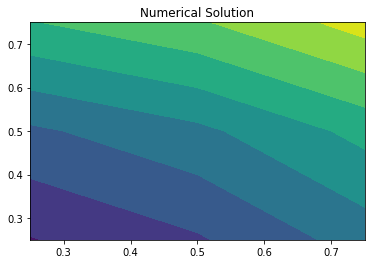

In [50]:
fig = plt.figure()
plt.contourf(Xi, Yi, U)
plt.title("Numerical Solution")
plt.show()

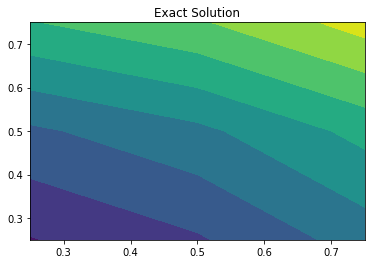

In [51]:
fig = plt.figure()
plt.contourf(Xi, Yi, U_exact)
plt.title("Exact Solution")
plt.show()